# 0.import

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# 1.Death by causes

In [2]:
dbc_df = pd.read_csv("dataset/01 annual-number-of-deaths-by-cause.csv")

In [ ]:
dbc_world = dbc_df[dbc_df['Entity']=='World'].drop(
    [
        "Entity",
        "Code",
        "Year",
        "Number of executions (Amnesty International)",
        "Terrorism (deaths)",
    ],
    axis=1,
).sum(axis=0).sort_values(ascending=True)

In [ ]:
cause_ls = list(map(lambda x: x.split(" - ")[1], dbc_world.index.to_list()))

[Text(0.5, 0, 'number of deaths')]

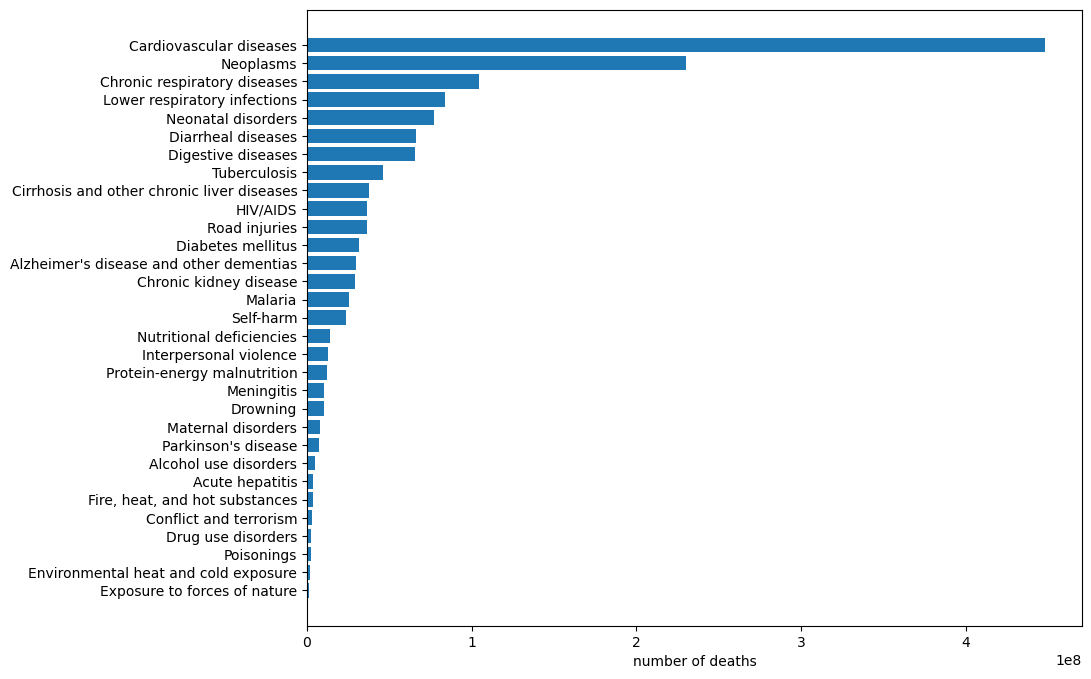

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
x = 0.5 + np.arange(len(cause_ls))
y = dbc_world
ax.barh(x, y, tick_label=cause_ls)
ax.ticklabel_format(style="sci", axis="x")
ax.set(xlabel='number of deaths')

# 2.Cancer deaths - Entity/Age

In [74]:
cda_df = pd.read_csv("dataset/03 cancer-death-rates-by-age.csv")

## 2.1.By entity

In [97]:
wb_region_df=cda_df[(cda_df['Entity'].apply(lambda x:x.endswith('(WB)'))) | (cda_df['Entity']=='World')]

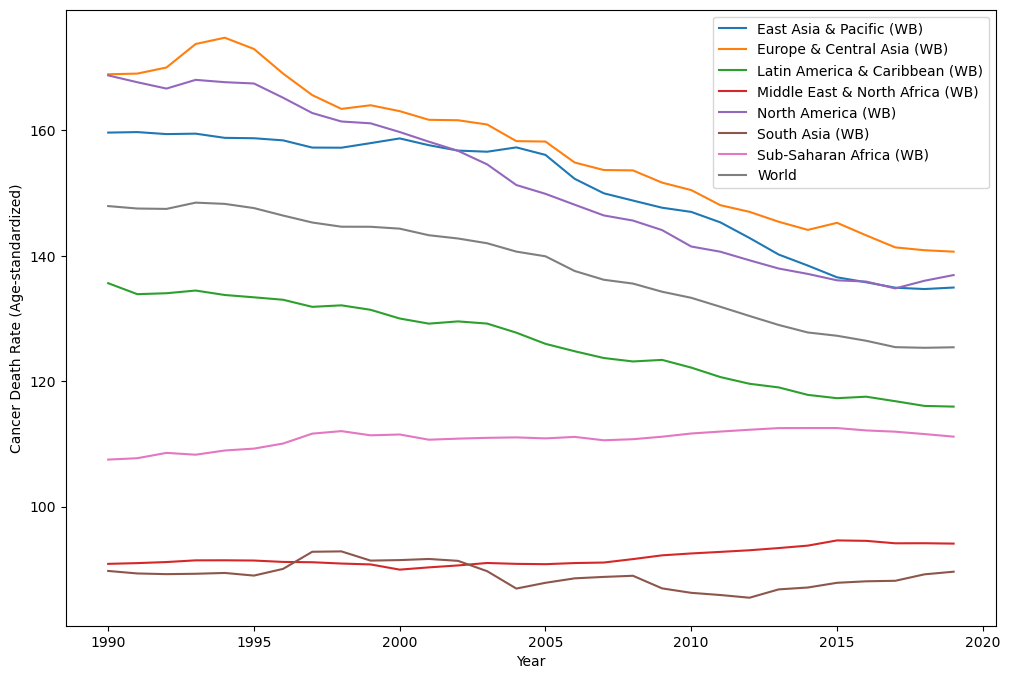

In [109]:
fig, ax = plt.subplots(figsize=(12,8))
for entity, data in wb_region_df.groupby("Entity"):
    ax.plot(
        [i for i in range(1990, 2020)],
        data.sort_values("Year", ascending=True)[
            "Deaths - Neoplasms - Sex: Both - Age: Age-standardized (Rate)"
        ],
        label=entity,
    )
ax.set(xlabel="Year", ylabel="Cancer Death Rate (Age-standardized)")
ax.legend()
plt.show()

## 2.2.By age

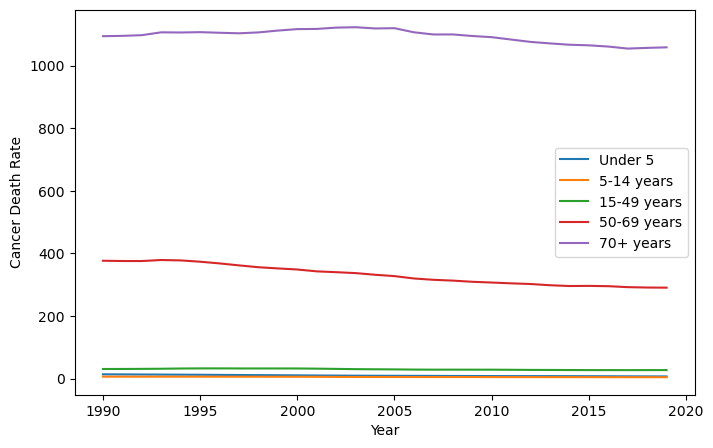

In [108]:
world_df=cda_df[cda_df['Entity']=='World']
fig, ax = plt.subplots(figsize=(8, 5))
for age in ["Under 5", "5-14 years", "15-49 years", "50-69 years", "70+ years"]:
    ax.plot([i for i in range(1990,2020)],world_df[f'Deaths - Neoplasms - Sex: Both - Age: {age} (Rate)'],label=age)
ax.set(xlabel="Year", ylabel="Cancer Death Rate")
ax.legend()
plt.show()

# 3.Cancer prevalence - Entity/Age

## 3.1.By entity

In [113]:
spca_df = pd.read_csv("dataset/05 share-of-population-with-cancer.csv")

In [117]:
wb_region_df = spca_df[
    (
        spca_df["Entity"].apply(
            lambda x: x
            in [
                "Central Europe, Eastern Europe, and Central Asia"
                "Central Latin America",
                "Latin America and Caribbean",
                "North Africa and Middle East",
                "North America",
                "South Asia",
                "Southeast Asia, East Asia, and Oceania",
                "Sub-Saharan Africa",
                "Western Europe",
                "World",
            ]
        )
    )
]

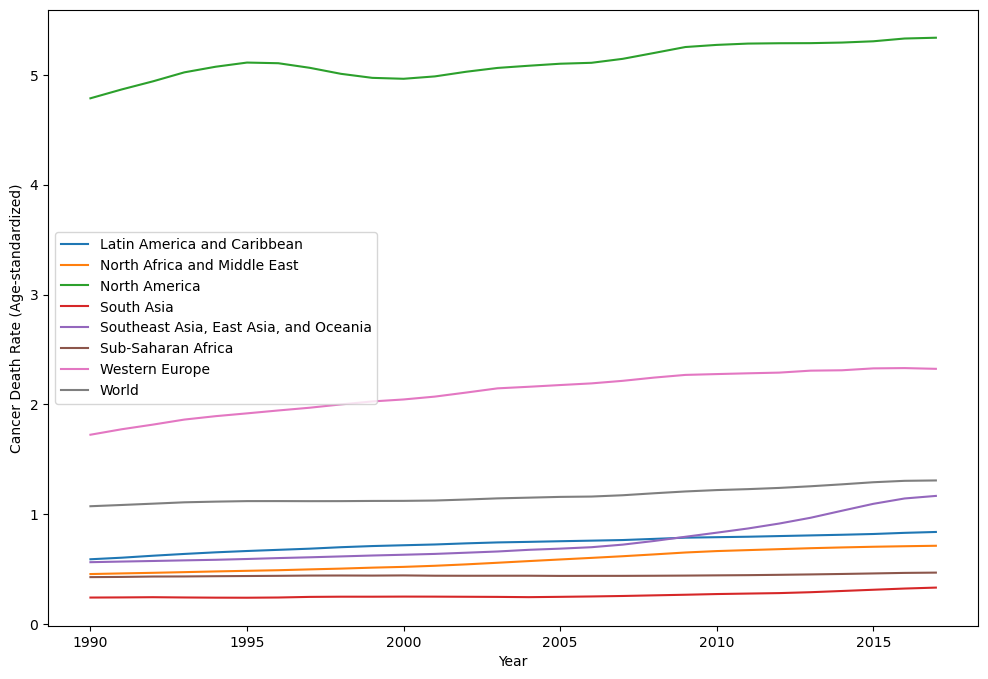

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
for entity, data in wb_region_df.groupby("Entity"):
    ax.plot(
        [i for i in range(1990, 2018)],
        data.sort_values("Year", ascending=True)[
            "Prevalence - Neoplasms - Sex: Both - Age: Age-standardized (Percent)"
        ],
        label=entity,
    )
ax.set(xlabel="Year", ylabel="Cancer Prevalence Percentage (Age-standardized)")
ax.legend()
plt.show()

## 3.2.By age

In [119]:
spc_df = pd.read_csv("dataset/07 share-of-population-with-cancer-by-age.csv")

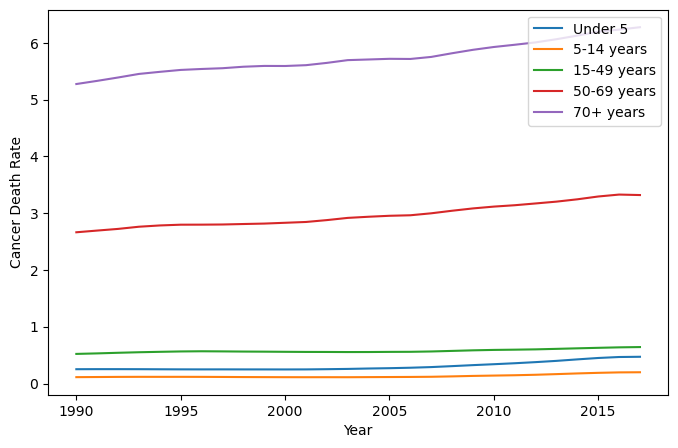

In [ ]:
world_df = spc_df[spc_df["Entity"] == "World"]
fig, ax = plt.subplots(figsize=(8, 5))
for age in ["Under 5", "5-14 years", "15-49 years", "50-69 years", "70+ years"]:
    ax.plot(
        [i for i in range(1990, 2018)],
        world_df[f"Prevalence - Neoplasms - Sex: Both - Age: {age} (Percent)"],
        label=age,
    )
ax.set(xlabel="Year", ylabel="Cancer Prevalence Percentage")
ax.legend()
plt.show()

# 4.Cancer type

## 4.1.Deaths

In [14]:
cdt_df = pd.read_csv("dataset/02 total-cancer-deaths-by-type.csv")

In [19]:
cdt_world = (
    cdt_df[cdt_df["Entity"] == "World"]
    .drop(
        [
            "Entity",
            "Code",
            "Year",
        ],
        axis=1,
    )
    .sum(axis=0)
    .sort_values(ascending=False)
)

In [67]:
other=cdt_world.iloc[-15:].sum()

In [68]:
merged_world = cdt_world.iloc[:-15].to_list()

In [69]:
merged_world.append(int(other))

In [74]:
type_ls = list(
    map(lambda x: x.split(" - ")[1], cdt_world.iloc[:-15].index.to_list())
)

In [75]:
type_ls.append('Other')

Text(0.5, 1.0, 'Global Cancer Deaths')

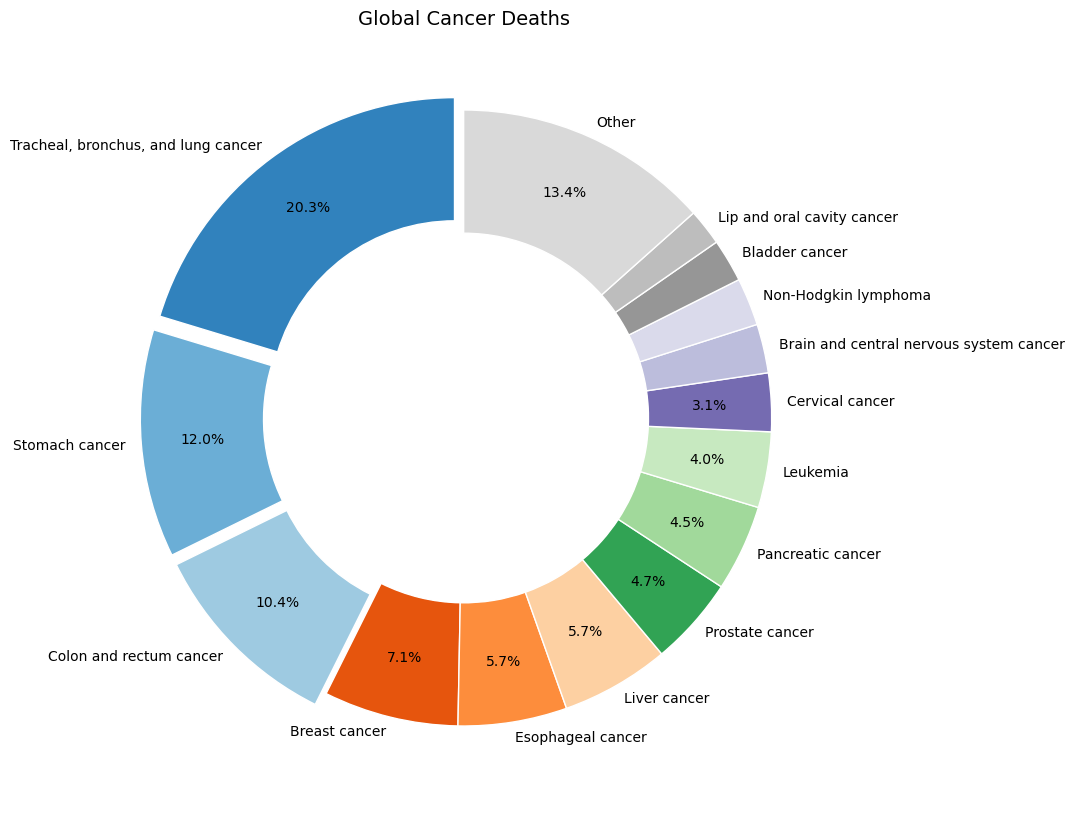

In [79]:
colors = plt.get_cmap("tab20c")(np.linspace(0, 1, len(merged_world)))
explode = [0.05 if i < 3 else 0 for i in range(len(merged_world))]

fig, ax = plt.subplots(figsize=(10, 10))
ax.pie(
    merged_world,
    labels=type_ls,
    startangle=90,
    explode=explode,
    autopct=lambda pct: f"{pct:.1f}%" if pct >= 3 else "",
    pctdistance=0.8,
    labeldistance=1.05,
    wedgeprops=dict(width=0.4, edgecolor="white"),
    colors=colors,
)
centre_circle = plt.Circle((0, 0), 0.6, fc="white")
fig.gca().add_artist(centre_circle)
ax.set_title("Global Cancer Deaths", fontsize=14)